In [5]:
import autograd.numpy as np_
from autograd import grad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('data/dados_A771_H_2019-01-01_2024-10-17.csv', sep=';', skiprows=10)
df.drop(columns=["Unnamed: 3"], inplace=True)
df.head()

,Data Medicao,Hora Medicao,TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)
0,2019-01-01,0,21.5
1,2019-01-01,100,21.6
2,2019-01-01,200,21.1
3,2019-01-01,300,20.7
4,2019-01-01,400,20.9


In [7]:
def criar_janelas_temporais(df, n_passos):
    X, Y = [], []

    for i in range(n_passos, len(df)):
        X.append(df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'].values[i - n_passos:i])
        Y.append(df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'].values[i])
        
    return np_.array(X), np_.array(Y)

def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos.T + b
    mse = np_.mean((est - val)**2)
    return mse

def accuracy(y_test, y_est):
    return np_.mean(np_.sign(y_test) == np_.sign(y_est))

def calcular_mse(y_test, y_est):
    return np_.mean((y_test - y_est) ** 2)

g = grad(loss)

Acurácia: 1.0
Erro Quadrático Médio (MSE): 0.9726782022572873


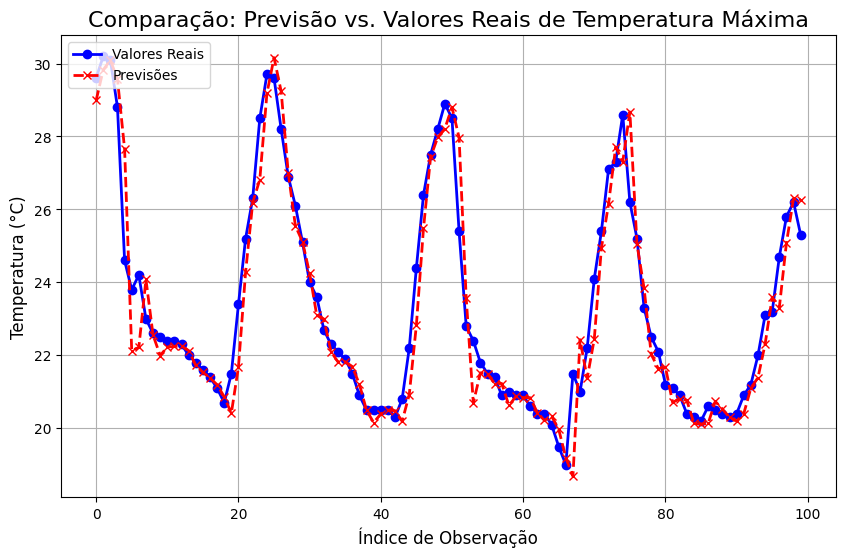

In [8]:
df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'] = pd.to_numeric(df['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'], errors='coerce') 
df = df.dropna(subset=['TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)'])

n_passos = 5
X, Y = criar_janelas_temporais(df, n_passos)

n_treino = int(len(X) * 0.7)
X_train, X_test = X[:n_treino], X[n_treino:]
y_train, y_test = Y[:n_treino], Y[n_treino:]

mean_X, std_X = X_train.mean(), X_train.std()
X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

N_DIMENSOES = X_train.shape[1]

w = np.random.randn(N_DIMENSOES, 1)
b = 0.0
alpha = 10**-2
n_treinos = 10000

pontos = X_train
alvos = np_.array([y_train])

for n in range(n_treinos):
    grad_ = g((w, b, pontos, alvos))
    w -= alpha * grad_[0]
    b -= alpha * grad_[1]


y_est = w.T @ X_test.T + b

y_test = np.array([y_test])

print(f"Acurácia: {accuracy(y_test, y_est)}")

mse = calcular_mse(y_test, y_est)
print(f"Erro Quadrático Médio (MSE): {mse}")

n_samples = 100
y_test_sample = y_test.flatten()[:n_samples]
y_est_sample = y_est.flatten()[:n_samples]


plt.figure(figsize=(10, 6))
plt.plot(y_test_sample, label="Valores Reais", color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(y_est_sample, label="Previsões", color='red', marker='x', linestyle='--', linewidth=2)
plt.title("Comparação: Previsão vs. Valores Reais de Temperatura Máxima", fontsize=16)
plt.xlabel("Índice de Observação", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [9]:
df = pd.read_csv('data/dados_A771_D_2019-01-01_2024-10-17.csv', sep=';', skiprows=10)
df.drop(columns=["Unnamed: 2"], inplace=True)
df.head()

,Data Medicao,"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)"
0,2019-01-01,30.7
1,2019-01-02,33.4
2,2019-01-03,34.5
3,2019-01-04,31.6
4,2019-01-05,25.0


In [10]:
def criar_janelas_temporais(df, n_passos):
    X, Y = [], []

    for i in range(n_passos, len(df)):
        X.append(df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].values[i - n_passos:i])
        Y.append(df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'].values[i])
        
    return np_.array(X), np_.array(Y)

def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos.T + b
    mse = np_.mean((est - val)**2)
    return mse

def accuracy(y_test, y_est):
    return np_.mean(np_.sign(y_test) == np_.sign(y_est))

def calcular_mse(y_test, y_est):
    return np_.mean((y_test - y_est) ** 2)

g = grad(loss)

Acurácia: 1.0
Erro Quadrático Médio (MSE): 14.706944392442795


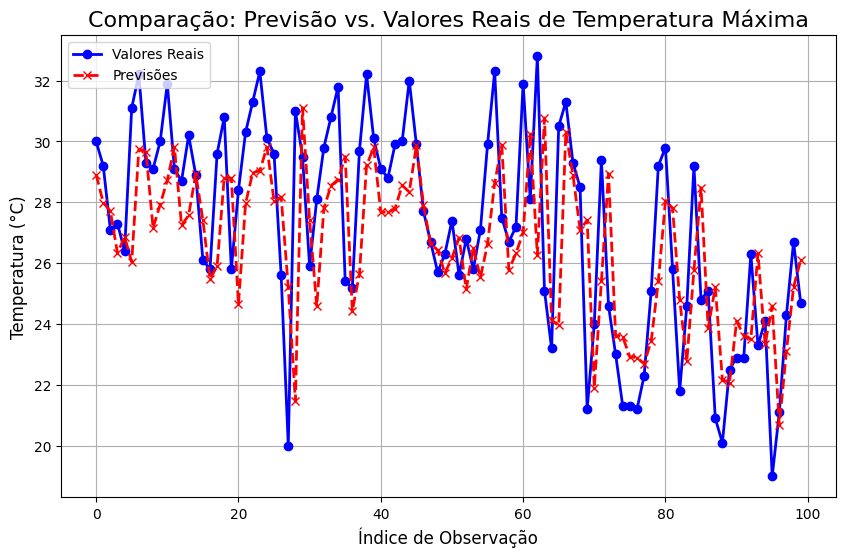

In [11]:
df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'] = pd.to_numeric(df['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'], errors='coerce')
df = df.dropna(subset=['TEMPERATURA MAXIMA, DIARIA (AUT)(°C)'])

n_passos = 4
X, Y = criar_janelas_temporais(df, n_passos)

n_treino = int(len(X) * 0.7)
X_train, X_test = X[:n_treino], X[n_treino:]
y_train, y_test = Y[:n_treino], Y[n_treino:]

mean_X, std_X = X_train.mean(), X_train.std()
X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

N_DIMENSOES = X_train.shape[1]

w = np.random.randn(N_DIMENSOES, 1)
b = 0.0
alpha = 10**-2
n_treinos = 10000

pontos = X_train
alvos = np_.array([y_train])

for n in range(n_treinos):
    grad_ = g((w, b, pontos, alvos))
    w -= alpha * grad_[0]
    b -= alpha * grad_[1]


y_est = w.T @ X_test.T + b

y_test = np.array([y_test])

print(f"Acurácia: {accuracy(y_test, y_est)}")

mse = calcular_mse(y_test, y_est)
print(f"Erro Quadrático Médio (MSE): {mse}")

n_samples = 100
y_test_sample = y_test.flatten()[:n_samples]
y_est_sample = y_est.flatten()[:n_samples]


plt.figure(figsize=(10, 6))
plt.plot(y_test_sample, label="Valores Reais", color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(y_est_sample, label="Previsões", color='red', marker='x', linestyle='--', linewidth=2)
plt.title("Comparação: Previsão vs. Valores Reais de Temperatura Máxima", fontsize=16)
plt.xlabel("Índice de Observação", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [12]:
df = pd.read_csv('data/dados_A771_D_2019-01-01_2024-10-17.csv', sep=';', skiprows=10)
df.drop(columns=["Unnamed: 2"], inplace=True)

df['Data Medicao'] = pd.to_datetime(df['Data Medicao'])

df.set_index('Data Medicao', inplace=True)

df = df.resample('W').max()

df.rename(columns={'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)': 'TEMPERATURA MAXIMA, SEMANAL (AUT)(°C)'}, inplace=True)

df.head()

,"TEMPERATURA MAXIMA, SEMANAL (AUT)(°C)"
Data Medicao,
2019-01-06,34.5
2019-01-13,34.2
2019-01-20,34.0
2019-01-27,34.3
2019-02-03,36.1


In [13]:
def criar_janelas_temporais(df, n_passos):
    X, Y = [], []

    for i in range(n_passos, len(df)):
        X.append(df['TEMPERATURA MAXIMA, SEMANAL (AUT)(°C)'].values[i - n_passos:i])
        Y.append(df['TEMPERATURA MAXIMA, SEMANAL (AUT)(°C)'].values[i])
        
    return np_.array(X), np_.array(Y)

def loss(parametros):
    w, b, pontos, val = parametros
    est = w.T @ pontos.T + b
    mse = np_.mean((est - val)**2)
    return mse

def accuracy(y_test, y_est):
    return np_.mean(np_.sign(y_test) == np_.sign(y_est))

def calcular_mse(y_test, y_est):
    return np_.mean((y_test - y_est) ** 2)

g = grad(loss)

Acurácia: 1.0
Erro Quadrático Médio (MSE): 5.2171096013438785


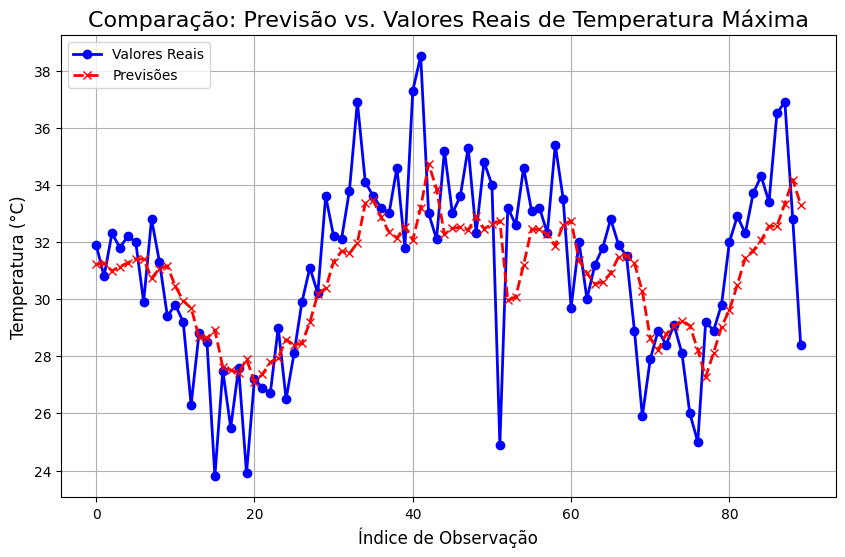

In [14]:
df['TEMPERATURA MAXIMA, SEMANAL (AUT)(°C)'] = pd.to_numeric(df['TEMPERATURA MAXIMA, SEMANAL (AUT)(°C)'], errors='coerce')
df = df.dropna(subset=['TEMPERATURA MAXIMA, SEMANAL (AUT)(°C)'])

n_passos = 3
X, Y = criar_janelas_temporais(df, n_passos)

n_treino = int(len(X) * 0.7)
X_train, X_test = X[:n_treino], X[n_treino:]
y_train, y_test = Y[:n_treino], Y[n_treino:]

mean_X, std_X = X_train.mean(), X_train.std()
X_train = (X_train - mean_X) / std_X
X_test = (X_test - mean_X) / std_X

N_DIMENSOES = X_train.shape[1]

w = np.random.randn(N_DIMENSOES, 1)
b = 0.0
alpha = 10**-2
n_treinos = 10000

pontos = X_train
alvos = np_.array([y_train])

for n in range(n_treinos):
    grad_ = g((w, b, pontos, alvos))
    w -= alpha * grad_[0]
    b -= alpha * grad_[1]


y_est = w.T @ X_test.T + b

y_test = np.array([y_test])

print(f"Acurácia: {accuracy(y_test, y_est)}")

mse = calcular_mse(y_test, y_est)
print(f"Erro Quadrático Médio (MSE): {mse}")

n_samples = 100
y_test_sample = y_test.flatten()[:n_samples]
y_est_sample = y_est.flatten()[:n_samples]


plt.figure(figsize=(10, 6))
plt.plot(y_test_sample, label="Valores Reais", color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(y_est_sample, label="Previsões", color='red', marker='x', linestyle='--', linewidth=2)
plt.title("Comparação: Previsão vs. Valores Reais de Temperatura Máxima", fontsize=16)
plt.xlabel("Índice de Observação", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()